<a href="https://colab.research.google.com/github/Raizel820/Data_Story/blob/master/Data_Story_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import subprocess as sp
import sys,os,shutil,pickle,time
from os.path import join
# mount Google Drive
from os.path import expanduser
gd_path=join(expanduser("~"),'gd')
if not os.path.isdir(gd_path):
    try:
        # load Google Drive
        from google.colab import drive,files
        drive.mount('/drive')
        sp.call('ln -s /drive/My\ Drive '+gd_path, shell=True)
    except:
        print('unable to find Google Drive Folder')
os.chdir(gd_path+'/MachineLearning')
os.listdir('.')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /drive


['kick_starter.csv',
 'craigslistVehiclesFull.csv',
 'PIACCsubset.csv',
 'PIACCsubset.txt',
 'PIACCsubset.xlsx',
 'Data Sets',
 'pycon-pandas-tutorial',
 'notebook_001.ipynb',
 'PIACCsubset.ipynb',
 'data_wrangling_json',
 'steam_reviews.csv',
 'education.csv',
 'pokemon_data.csv',
 'filtered.csv',
 'modified.csv',
 'modified.txt',
 'cars_cleaned.csv']

In [0]:
import pandas as pd

In [0]:
cars = pd.read_csv('cars_cleaned.csv')
cars.head()

,city,price,year,manufacturer,make,condition,fuel,odometer,title_status,transmission,drive,type,county_name,state_fips,state_name,weather
0,marshall,11900,2010.0,dodge,challenger se,good,gas,43600.0,clean,automatic,rwd,coupe,Lincoln,46.0,South Dakota,38.0
1,marshall,2800,2004.0,ford,taurus,good,gas,168591.0,clean,automatic,fwd,sedan,Osceola,19.0,Iowa,47.0
2,marshall,12500,2015.0,jeep,patriot high altitude,like new,gas,39500.0,rebuilt,automatic,4wd,SUV,Minnehaha,46.0,South Dakota,38.0
3,easttexas,8100,2009.0,cadillac,cts,excellent,gas,100098.0,clean,automatic,rwd,sedan,Wood,48.0,Texas,67.0
4,lasvegas,9800,2004.0,rover,discovery 2,excellent,gas,148500.0,clean,automatic,4wd,SUV,Clark,32.0,Nevada,46.0


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

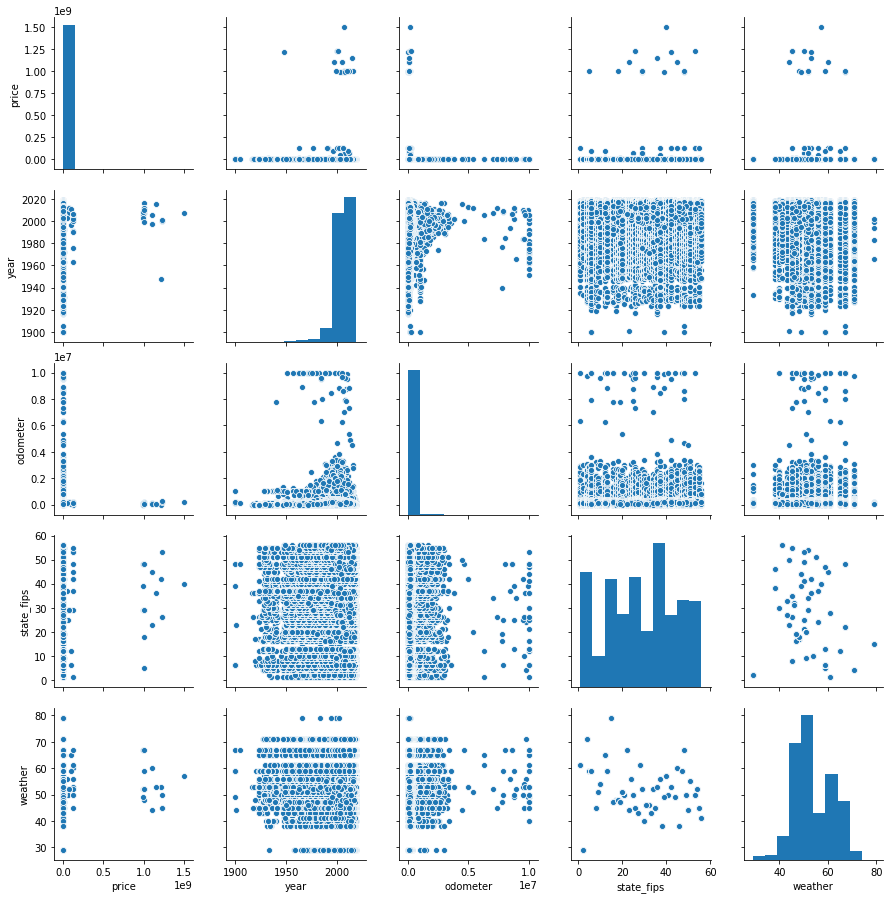

In [0]:
sns.pairplot(cars)

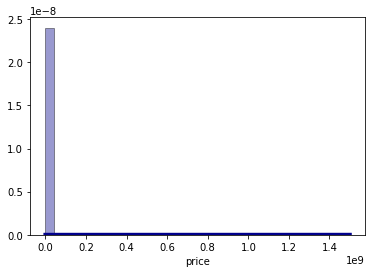

In [0]:
# Density Plot and Histogram of all arrival delays
sns.distplot(cars['price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

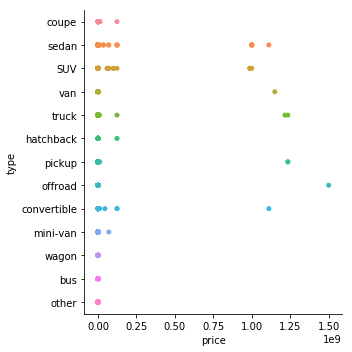

In [0]:
sns.catplot(x="price", y="type", jitter=False, data=cars);

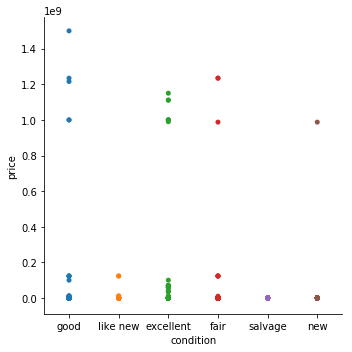

In [0]:
sns.catplot(x="condition", y="price", jitter=False, data=cars);

In [0]:
list(cars)

['city',
 'price',
 'year',
 'manufacturer',
 'make',
 'condition',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'type',
 'county_name',
 'state_fips',
 'state_name',
 'weather']

In [0]:
pd.crosstab(index=cars["type"],  # Make a crosstab
                      columns="count") 

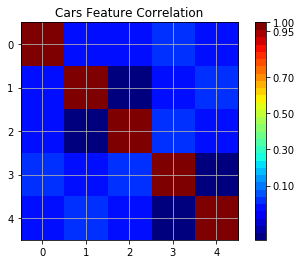

In [0]:
def correlation_matrix(cars):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(cars.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Cars Feature Correlation')
    #labels=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
    #ax1.set_xticklabels(labels,fontsize=6)
    #ax1.set_yticklabels(labels,fontsize=6)
    
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.1,.3,.5,.70,.95,1])
    plt.show()

correlation_matrix(cars)

In [0]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

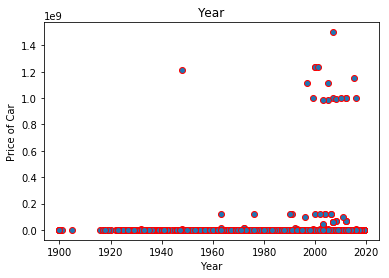

In [0]:
plt.scatter(cars['year'], cars['price'], edgecolors='r')
#plt.yticks(range(1, 20000))
plt.xlabel('Year')
plt.ylabel('Price of Car')
plt.title('Year')
plt.show()

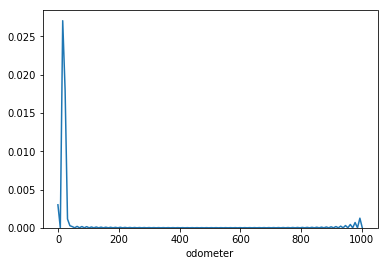

In [0]:
sns.distplot(cars['odometer']/10000, hist=False)

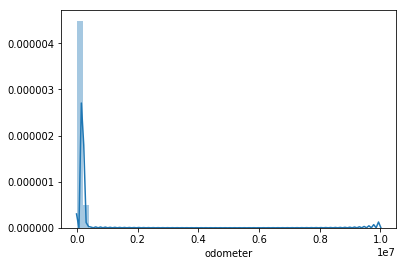

In [0]:
sns.distplot(cars['odometer'])

In [0]:
len(cars['weather'])

500090

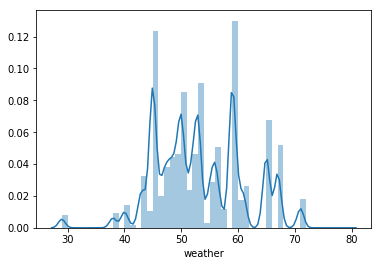

In [0]:
sns.distplot(cars['weather']) #histogram

In [0]:
sns.distplot(cars['condition']) # This is not working because condition is not str type

In [0]:
cars['condition'].sort_values()#.plot(kind='bar')

In [0]:
cabin_tab = pd.crosstab(index=cars["condition"],  # Make a crosstab
                        columns="count")  
cabin_tab 

col_0,count
condition,
excellent,231681
fair,29477
good,184753
like new,49842
new,2282
salvage,2055


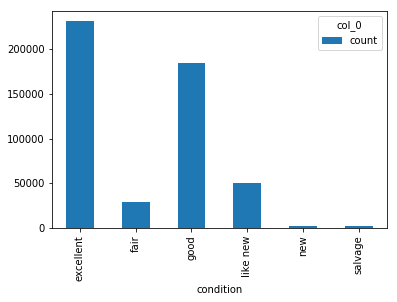

In [0]:
cabin_tab.plot(kind='bar')

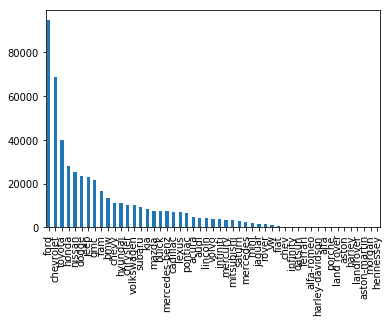

In [0]:
pd.Series(cars['manufacturer']).value_counts().plot('bar')

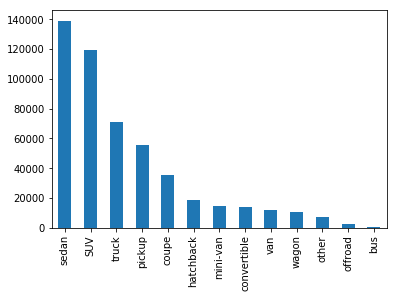

In [0]:
cars.type.value_counts().plot.bar() # This is a generalized formula of a bar chart

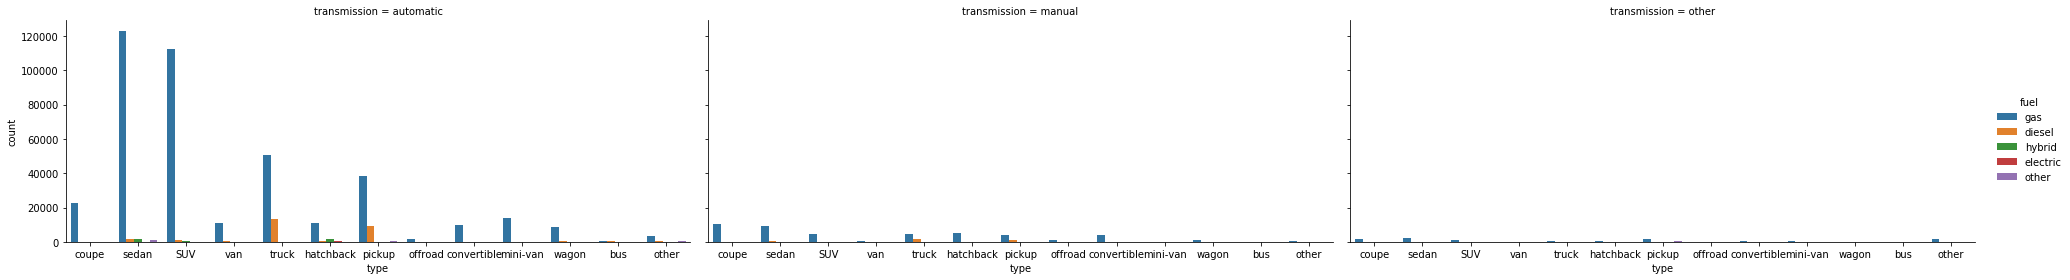

In [0]:
sns.catplot(x="type", hue="fuel", col="transmission",
                 data=cars, kind="count",
               height=4, aspect= 2.3);
         

In [0]:
cars.year.sort_values().tail() #Check the latest year

122975    2019.0
56306     2019.0
453925    2019.0
178325    2019.0
101634    2019.0
Name: year, dtype: float64

<Figure size 1368x432 with 0 Axes>

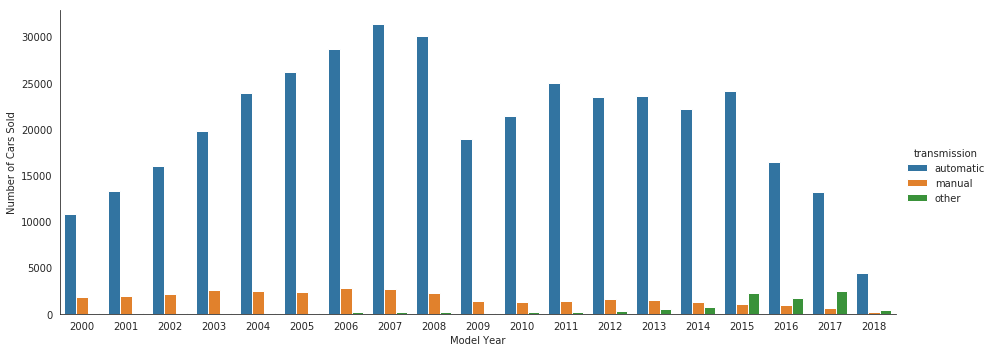

In [0]:
# 1. Enlarge the plot
plt.figure(figsize=(19,6))

with sns.axes_style('white'):
    g = sns.catplot("year", data=cars, aspect=2.5, kind='count',
                       hue='transmission', order=range(2000, 2019))
    g.set_ylabels('Number of Cars Sold')
    g.set_xlabels('Model Year')

In [0]:
list(cars)

['city',
 'price',
 'year',
 'manufacturer',
 'make',
 'condition',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'type',
 'county_name',
 'state_fips',
 'state_name',
 'weather']

In [0]:
pd.crosstab(index=cars["drive"],  # Make a crosstab
                        columns="count") 


col_0,count
drive,
4wd,201744
fwd,185600
rwd,112746


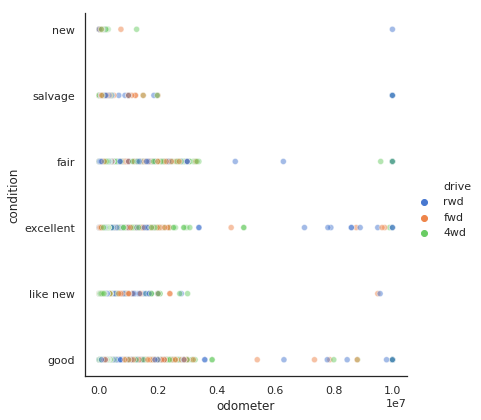

In [0]:
sns.set(style="white")
sns.relplot(x="odometer", y="condition", hue="drive", alpha=.5, palette="muted",
            height=6, data=cars)


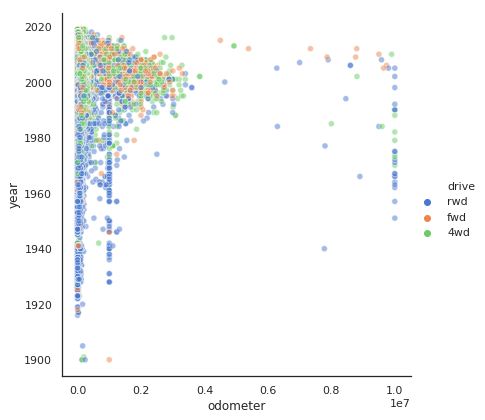

In [0]:
sns.relplot(x="odometer", y="year", hue="drive", alpha=.5, palette="muted",
            height=6, data=cars)  